#### Author : SINU S MARIAM
#### Designation : Data Science Intern  
#### Organization : LetsGrowMore
#### Batch : MARCH 2023
#### Task 1 -DEVELOP A NEURAL NETWORK THAT CAN READ HANDWRITING ( ADVANCED LEVEL TASK)
#### Problem Statement:
* Create a Neural Network Machine Learning Model that can identify  Handwritten digits using Tensorflow and CNN on MNIST Dataset

In [1]:
#importing necessary libraries 
import tensorflow as tf
#importing libraries for visualisation
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Checking Tensorflow Version
tf.__version__

'2.11.0'

####  Performing descriptive analysis. Understand the variables and their corresponding values. 

In [3]:
# Importing MNIST (Modified National Institute of Standards and Technology Dataset)
# Training set of 60,000 examples, and a test set of 10,000 examples consisting of Handwritten digits from 0 to 9
from tensorflow.keras.datasets import mnist 
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

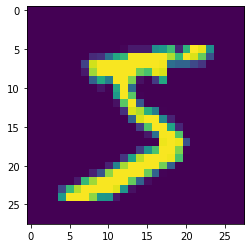

In [4]:
# Plotting the first image in the dataset
plt.imshow(X_train[0])

In [5]:
# checking the first shape of one image in dataset
X_train[0].shape

(28, 28)



*  Each image is 28 * 28 in dimension


In [6]:
 # Printing the first number in Y_train corresponding to the first image in X_Train
 print(Y_train[0])

5


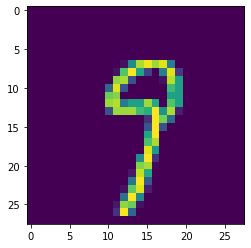

In [7]:
plt.imshow(X_train[1500])

In [8]:
print(Y_train[1500])

9


In [9]:
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', Y_train.shape)
print('Target for test: ', Y_test.shape)

Train set of features:  (60000, 28, 28)
Test set of features:  (10000, 28, 28)
Target for train:  (60000,)
Target for test:  (10000,)



*   Train Dataset has 60000 Digit Images
*   Test Dataset has 10000 Digit Images
*   Each Image is of size 28 * 28

In [10]:
#CNN(Convolutional Neural Network) takes 4 Dimentional array as input 
#Input data has should be reshaped to (batch_size, height, width, depth)
#Reshape the Images  to add a depth of 1.
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [11]:
# Dimensions of reshaped Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', Y_train.shape)
print('Target for test: ', Y_test.shape)

Train set of features:  (60000, 28, 28, 1)
Test set of features:  (10000, 28, 28, 1)
Target for train:  (60000,)
Target for test:  (10000,)


In [12]:
# One-Hot Encoding used to label target columns in both train and test sets
from keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### Building the Neutral Network Model

In [13]:
### Create the model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
my_model = Sequential()

#Layers are added to model
# Activation functions learn complex (non-linear) representations of data.
# Input layer activation Function is RELU, which plots values between 0 and x. Output Layer uses activation fn as Softmax which sqashes values between 0 and 1
# Convolutional layer applies filters to the input image to extract features. Here the filter size is 3 x 3
# Max Pooling layer downsamples the image to reduce computation and filter sizes is 2 X 2 
# Fully connected layer makes the final prediction.
my_model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
my_model.add(Conv2D(32, kernel_size=3, activation='relu'))
my_model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
my_model.add(Flatten())
my_model.add(Dense(10, activation='softmax'))

In [14]:
# Model Compilation
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Fitting the model 
# Epoch refers to one cycle through full training dataset. Here 3 Epochs are use
h1=my_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 219s 116ms/step - loss: 0.2198 - accuracy: 0.9523 - val_loss: 0.0770 - val_accuracy: 0.9766
Epoch 2/3
1875/1875 [==============================] - 201s 107ms/step - loss: 0.0704 - accuracy: 0.9793 - val_loss: 0.0670 - val_accuracy: 0.9772
Epoch 3/3
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0585 - val_accuracy: 0.9812


In [16]:
# Model Summary
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 10)                46090     
                                                                 
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
____________________________________________________

#### Predicting Handwritten Digits Using model

In [17]:
# Prediction
Y_pred=my_model.predict(X_test)
Y_pred

313/313 [==============================] - 8s 25ms/step


array([[2.1275260e-07, 3.2467902e-08, 6.1607648e-07, ..., 9.9980688e-01,
        8.6084402e-09, 8.2818224e-07],
       [5.4356293e-09, 1.3119015e-06, 9.9999624e-01, ..., 7.7618315e-13,
        2.2579275e-06, 6.9624701e-12],
       [1.9897243e-05, 9.9868178e-01, 4.1231229e-05, ..., 3.3043500e-04,
        4.7920583e-04, 1.4392115e-06],
       ...,
       [2.5872067e-09, 4.7331113e-07, 4.5546128e-12, ..., 4.0507119e-05,
        4.8525912e-05, 8.7815833e-06],
       [3.0393923e-09, 5.6998959e-12, 4.0483938e-10, ..., 5.6811653e-11,
        1.4973576e-06, 6.3071470e-10],
       [3.8853059e-09, 1.1891596e-10, 2.6032883e-08, ..., 1.0111212e-13,
        2.7258196e-08, 7.8527934e-11]], dtype=float32)

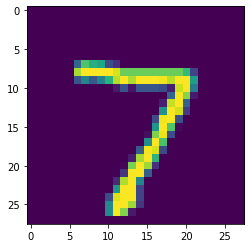

In [18]:
# Plotting one test iImage
plt.imshow(X_test[0])

In [19]:
# Printing the  corresponding  predicted Image
import numpy as np
np.argmax(Y_pred[0])

7

In [20]:
h1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Test the model

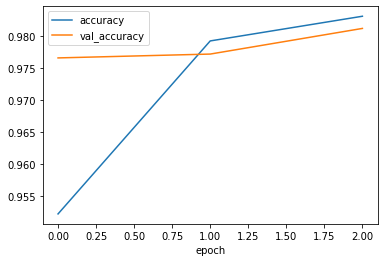

In [21]:
# Plotting between Accuracy and Validation Accuracy
# Validation accuracy shows how well, the model performs when it is fed with new data
plt.plot(h1.history["accuracy"],label='accuracy')
plt.plot(h1.history["val_accuracy"],label='val_accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

* We can see that after 1 epoch, both validatation accuracy and accuracy stabilizes.

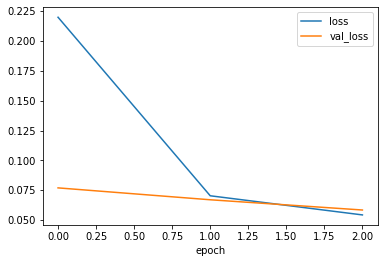

In [22]:
# Plotting between Loss and Validation Loss
plt.plot(h1.history["loss"],label='loss')
plt.plot(h1.history["val_loss"],label='val_loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

 --------------------------------**THE END**-------------------------